In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [0]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [0]:
cancer.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
print(cancer.data.shape)

(569, 30)


In [0]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'], ['target']))

In [0]:
df_cancer.head()

mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890     0.0
1        20.57         17.77  ...                  0.08902     0.0
2        19.69         21.25  ...                  0.08758     0.0
3        11.42         20.38  ...                  0.17300     0.0
4        20.29         14.34  ...                  0.07678     0.0

[5 rows x 31 columns]

**VISUALISATION**

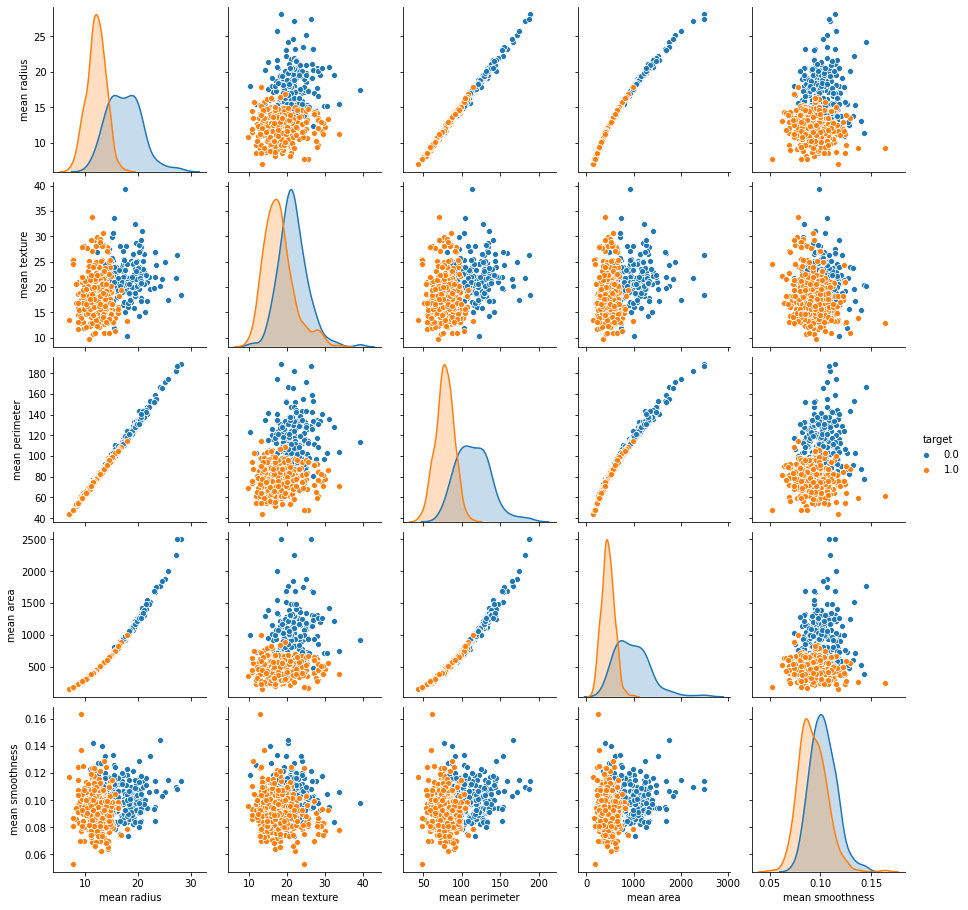

In [0]:
sns.pairplot(df_cancer,  hue = 'target',vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness'])

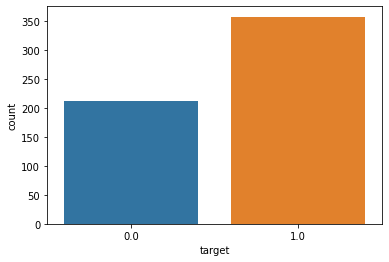

In [0]:
sns.countplot(df_cancer['target'])

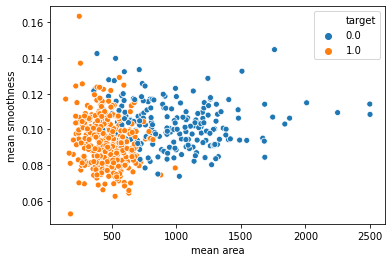

In [0]:
sns.scatterplot(x = df_cancer['mean area'], y = df_cancer['mean smoothness'], hue = 'target',  data = df_cancer)

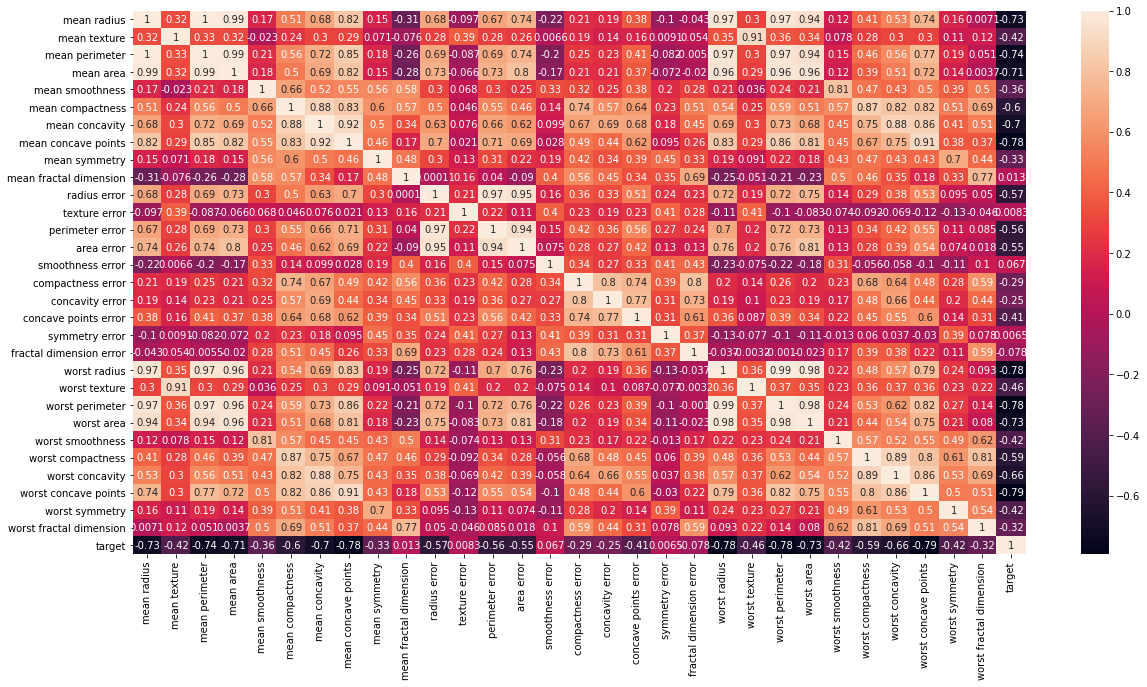

In [0]:
plt.figure(figsize = (20,10))
sns.heatmap(df_cancer.corr(), annot = True)

**MODEL TRAINING**

In [0]:
X = df_cancer.drop(['target'], axis = 1)
Y = df_cancer['target']

In [0]:
X

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]

In [0]:
Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.20, random_state = 42)

In [0]:
print(y_train)

68     1.0
181    0.0
63     1.0
248    1.0
60     1.0
      ... 
71     1.0
106    1.0
270    1.0
435    0.0
102    1.0
Name: target, Length: 455, dtype: float64


(455,)


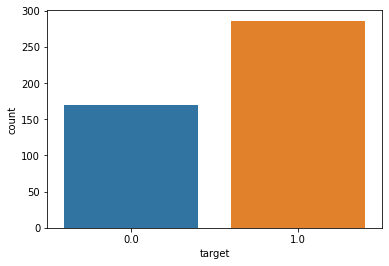

In [0]:
sns.countplot(y_train)
print(y_train.shape)

(114,)


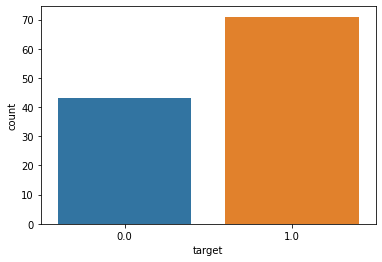

In [0]:
sns.countplot(y_test)
print(y_test.shape)

In [0]:
from sklearn.svm import SVC

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
model = SVC()
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = model.predict(x_test)
print(y_pred)

[1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]


In [0]:
cm = confusion_matrix(y_test, y_pred)

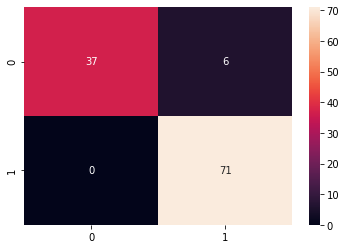

In [0]:
sns.heatmap(cm, annot = True)

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        43
         1.0       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



**IMPROVISING THE MODEL**

In [0]:
min_train = x_train.min()
range_train = (x_train- min_train).max()
x_train_scaled = (x_train - min_train)/range_train

In [0]:
print(x_train_scaled)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
68      0.065527      0.257694  ...        0.524936                 0.529502
181     0.656203      0.570172  ...        0.499310                 0.621906
63      0.072579      0.140345  ...        0.338459                 0.253137
248     0.144914      0.524518  ...        0.363493                 0.224059
60      0.121407      0.174839  ...        0.392667                 0.213293
..           ...           ...  ...             ...                      ...
71      0.058622      0.166723  ...        0.135817                 0.452357
106     0.193398      0.291512  ...        0.244628                 0.304595
270     0.323179      0.240446  ...        0.176030                 0.052221
435     0.307997      0.335137  ...        0.318155                 0.427772
102     0.219844      0.365573  ...        0.222551                 0.116480

[455 rows x 30 columns]


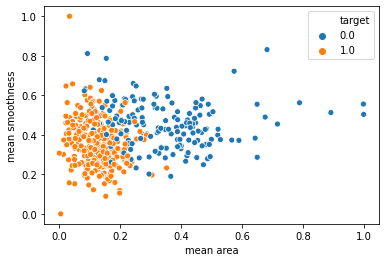

In [0]:
sns.scatterplot(x = x_train_scaled['mean area'], y = x_train_scaled['mean smoothness'], hue = y_train)

In [0]:
min_test = x_test.min()
range_test = (x_test- min_test).max()
x_test_scaled = (x_test - min_test)/range_test

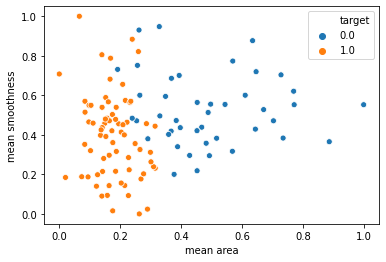

In [0]:
sns.scatterplot(x = x_test_scaled['mean area'], y = x_test_scaled['mean smoothness'], hue = y_test)

In [0]:
model.fit(x_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = model.predict(x_test_scaled)

In [0]:
cm = confusion_matrix(y_test, y_pred)

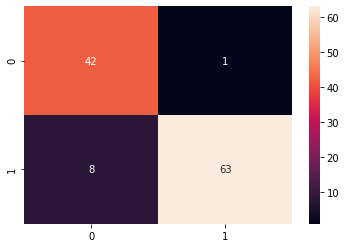

In [0]:
sns.heatmap(cm, annot = True)

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90        43
         1.0       0.98      0.89      0.93        71

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



**IMPROVING MODEL PART 2**

In [0]:
param_grid = {'C' : [0.1, 1, 10, 100] , 'gamma' : [1, 0.1, 0.01, 0.001], 'kernel' : ['rbf']}

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
grid = GridSearchCV(SVC(),  param_grid, refit = True, verbose = 4)

In [0]:
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.923, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.626, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.626, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.626, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.626, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.989, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.989, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [0]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [0]:
grid_pred = grid.predict(x_test_scaled)

In [0]:
cm = confusion_matrix(y_test, grid_pred)

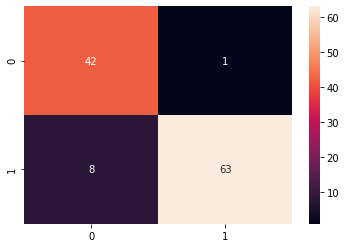

In [0]:
sns.heatmap(cm, annot = True)

In [0]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90        43
         1.0       0.98      0.89      0.93        71

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114

